# Color detection project

In [7]:
from utils import get_limits
import cv2
from PIL import Image


As we want to detect the color yellow, we will work in the pixels of the yellow region.

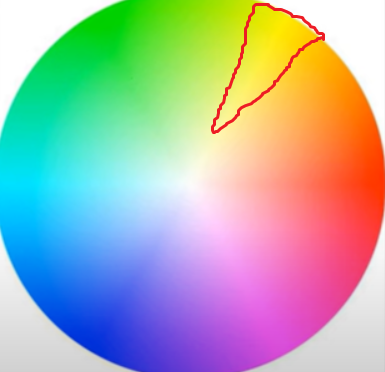

In [8]:
# Yellow in BGR color space
color_yellow = [0, 255, 255]
webcam = cv2.VideoCapture(0)
while True:
    ret, frame = webcam.read()
    # Handling the color detection
    # HSV color space : Hue, Saturation and Value : hue handles the info about the image
    
    # Convert image from BGR to HSV
    hsvImage = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Defining the yellow range
    lower, upper = get_limits(color_yellow)
    
    # Defining the location of all the pixels we want : the yellow
    mask = cv2.inRange(hsvImage, lower, upper)
    
    # Drawing the bounding box around our yellow objects
    mask_ = Image.fromarray(mask) # Convert the cv2 numpy array into Pillow
    bbox = mask_.getbbox()
    #print(bbox)
    if bbox :
        x1, y1, x2, y2 = bbox
        frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Show the frame of the webcam
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()  